# Semana 9: Análisis estadístico de datos 

## 📑 Estadística descriptiva
La estadística descriptiva se encarga de resumir y describir las características principales de un conjunto de datos.
Su objetivo es ofrecer una visión general del comportamiento de los datos antes de realizar análisis más complejos.

### 🎯 Variables continuas y discretas
- **Discretas:** Las variables discretas guardan valores especificos, normalmente son contables como por ejemplo: número de hijos, cantidad de productos vendidos, etc.
- **Continuas:** Las variables continuas guardan valores que se encuentren dentro de un rango o valores con mediciones precisas como por ejemplo: la altura, peso, temperatura, tiempo, etc.

In [1]:
# Variables discretas (número de mascotas)
discretas = [0, 1, 2, 3, 1, 2, 3]

# Variables continuas (peso en kg)
continuas = [58.5, 61.2, 63.0, 59.7, 62.8, 64.1]

### 📊 Histogramas de frecuencia
Un histograma de frecuencia muestra cuántos datos caen dentro de intervalos específicos. Son ideales para las variables continuas, ya que se puede utilizar facilmente para medir la frecuencia dentro de rangos.

**Aspectos importantes:**
- Nos ayuda a visualizar la forma de la distribución de datos.
- Permite identificar patrones como asimetrías, modas múltiples, o outliers.
- Ayuda que los datos se agrupen en intervalos.

Text(0, 0.5, 'Frecuencia')

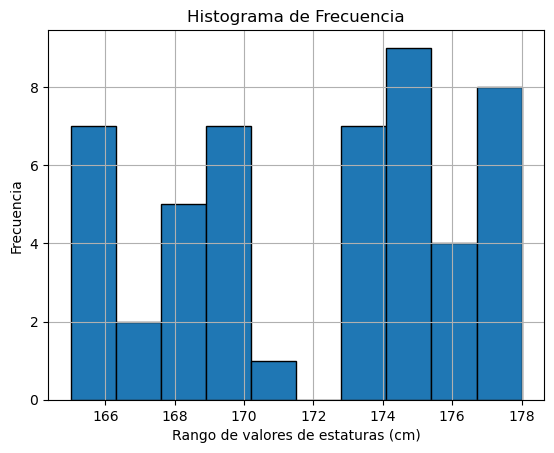

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos aleatorios
data = np.random.randint(165, 180, 50)

# Crear histograma de frecuencia
plt.hist(data, bins=10, edgecolor='black')
plt.title('Histograma de Frecuencia')
plt.xlabel('Rango de valores de estaturas (cm)')
plt.grid()
plt.ylabel('Frecuencia')

### 📊 Histogramas de densidad
Un histograma de densidad es similar al de frecuencia, pero en lugar de mostrar el número de datos, muestra la proporción de datos respecto al total.

**Aspectos importantes:**
- Nos permite comparar datasets de diferentes tamaños.
- Se puede observar la "probabilidad" aproximada de caer en ciertos intervalos.

Text(0, 0.5, 'Densidad')

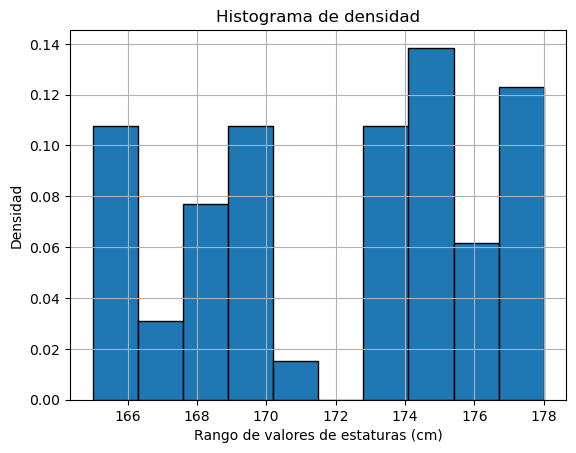

In [3]:
# Crear histograma de frecuencia
plt.hist(data, bins=10, density=True, edgecolor='black')
plt.title('Histograma de densidad')
plt.xlabel('Rango de valores de estaturas (cm)')
plt.grid()
plt.ylabel('Densidad')

### 📐 Medidas de posición y de variabilidad
**Las medidas de posición:** las medidas de posición nos ayuda a caracterizar los valores "típicos" que conocemos como:
- **Media:** Promedio aritmetico.
- **Mediana:** Valor que divide los datos en dos partes iguales.
- **Moda:** El valor que más se repite de los datos

**Medida de variabilidad:** Nos ayuda a observar que tan disperso están nuestros datos:
- **Rango:** Diferencia entre el valor máximo y minimo.
- **Varianza:** Medida promedio de cuánto se alejan los datos respecto a la media.
- **Desviación estandar:** Raíz cuadrada de la varianza.

Estas medidas son esenciales para describir no solo el valor central, sino también el comportamiento completo de los datos.

In [4]:
import scipy.stats as stats

# Media
media = int(np.mean(data))
# Mediana
mediana = int(np.median(data))
# Moda
moda = stats.mode(data)

print(f"Media: {media}, Mediana: {mediana}, Moda: {moda[0]}")

Media: 172, Mediana: 173, Moda: 175


           label  lower_whisker  lower_quartile  median  upper_quartile  \
0  Estaturas(50)          165.0           168.0   173.0           175.0   

   upper_whisker  
0          178.0  


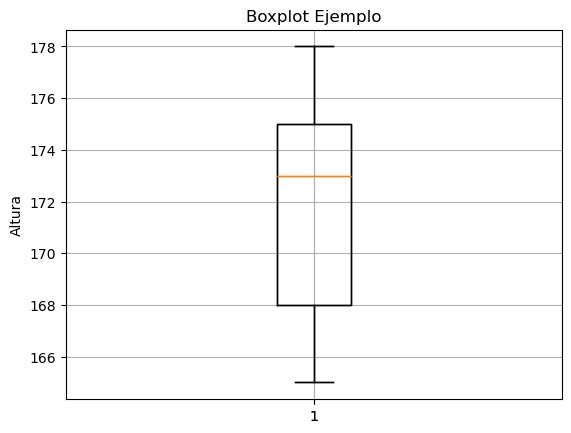

In [5]:
import pandas as pd

def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

plt.boxplot(data)
plt.ylabel("Altura")
plt.grid()
plt.title("Boxplot Ejemplo")
labels = [f"Estaturas({len(data)})"]
print(get_box_plot_data(labels,plt.boxplot(data)))

### 🔃 Varianza
La varianza cuantifica cuánto varían los datos alrededor de la media.

- Si la varianza es pequeña, los datos están cercanos a la media.
- Si la varianza es grande, los datos están más dispersos.

Matemáticamente, es el promedio de las diferencias al cuadrado respecto a la media.

In [6]:
# Varianza
varianza = np.var(data)
print(f"Varianza: {varianza}")

Varianza: 17.438399999999994


### 📏 Desviación estándar y distribución normal
La desviación estándar es simplemente la raíz cuadrada de la varianza. Tiene la ventaja de que sus unidades son las mismas que los datos originales.
La distribución normal es una de las distribuciones más comunes en estadística:
- Forma de "campana" simétrica.
- La mayoría de los valores están cerca de la media.
Conocer la distribución normal es fundamental para técnicas posteriores como inferencia estadística y machine learning.

Desviación estándar: 4.175931033913275


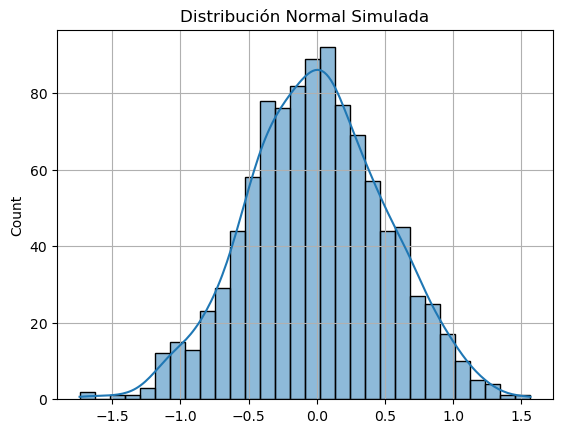

In [7]:
import seaborn as sns
# Desviación estándar
desviacion = np.std(data)
print(f"Desviación estándar: {desviacion}")

# Simular distribución normal
normal_data = np.random.normal(loc=0, scale=0.5, size=1000)

sns.histplot(normal_data,kde=True, bins=30)
plt.title('Distribución Normal Simulada')
plt.grid()
plt.show()

### 🚨 Datos sesgados y valores atípicos

Los datos sesgados son una distribución no simétrica, que no proporcionan una representación precisa de un estudio. Existen dos tipos de sesgos: sesgo positivo y sesgo negativo.\
El sesgo afecta medidas como la media y puede llevar a interpretaciones erróneas si no se detecta.\
\
los valores atípicos son una observación que es numéricamente distante del resto de los datos. Las estadísticas derivadas de los conjuntos de datos que incluyen valores atípicos serán frecuentemente engañosas.

In [8]:
#datos aleatorios
data = np.random.normal(165,5,1000)

# Detectar outliers usando el rango intercuartílico
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

outliers = data[(data < limite_inferior) | (data > limite_superior)]
print(f"Valores atípicos: {outliers}")

Valores atípicos: [178.10207938 179.33372468 183.99522609 151.22732879]


             label  lower_whisker  lower_quartile      median  upper_quartile  \
0  Estaturas(1000)     151.806145      161.576166  164.930605      168.166354   

   upper_whisker  
0     177.947489  


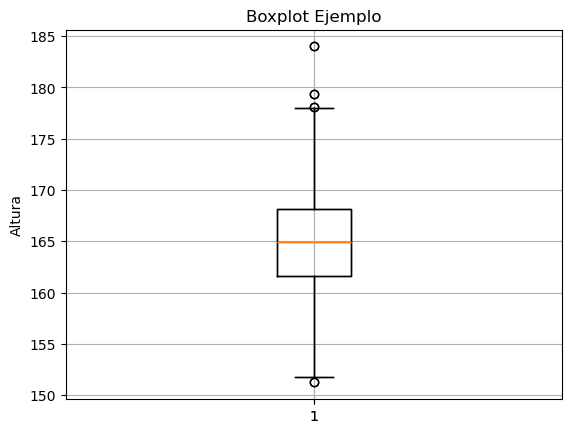

In [9]:
plt.boxplot(data)
plt.ylabel("Altura")
plt.grid()
plt.title("Boxplot Ejemplo")
labels = [f"Estaturas({len(data)})"]
print(get_box_plot_data(labels,plt.boxplot(data)))

### 💻📖 Pongamos a prueba nuestro conocimiento
Supongamos que trabajamos en una empresa que analiza los tiempos de entrega de pedidos de un servicio de compras online.
Nos han entregado un dataset con 100 pedidos, y debemos realizar un análisis estadístico descriptivo para entender el desempeño de las entregas.
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Semilla para reproducibilidad
np.random.seed(42)

# Simulamos tiempos de entrega (en días)
tiempos_entrega = np.random.normal(loc=5, scale=2, size=100)

# Agregamos algunos valores atípicos manualmente
tiempos_entrega[::10] += np.random.randint(5, 10, size=10)

# Crear DataFrame
df = pd.DataFrame({
    "pedido_id": np.arange(1, 101),
    "tiempo_entrega_dias": tiempos_entrega
})

df.head()
```